In [1]:
import tensorflow as tf

import tensorflow.keras.utils as utils

import tensorflow.keras.applications as applications

import tensorflow_datasets as tfds

tfds.disable_progress_bar()

import warnings; warnings.filterwarnings('ignore')

import os, pathlib

In [ ]:
inset = "cats_vs_dogs"

split = ["train[:10%]", "train[80%:90%]", "train[90%:]"]

ontrue = !False

(train, testi, valid) = tfds.load(inset, split=split, as_supervised=ontrue)

In [3]:
len(train), len(testi), len(valid)

(2326, 2326, 2326)

In [4]:
input_shape = (160, 160)

inlabel = lambda i, l : (tf.image.resize(i, input_shape) / 255.0, l)

batch = 64

train = train.map(inlabel).shuffle(len(train)).batch(batch).cache()

testi = testi.map(inlabel).batch(batch)

valid = valid.map(inlabel).batch(batch)

In [ ]:
from tensorflow.keras.applications import MobileNet

import tensorflow.keras.layers as layers

inputs = layers.Input((160, 160, 3))

intnet = MobileNet(input_tensor=inputs, weights='imagenet', include_top=False)

intnet.trainable = False

In [6]:
x = layers.GlobalAveragePooling2D()(intnet.output)

output = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, output)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

plot = model.fit(train, validation_data=valid, epochs=5)

In [8]:
model.evaluate(train)

[0.06491244584321976, 0.9780739545822144]

In [9]:
model.evaluate(valid)

[0.07737751305103302, 0.970765233039856]

In [10]:
model.evaluate(testi)

[0.08532291650772095, 0.9638864994049072]

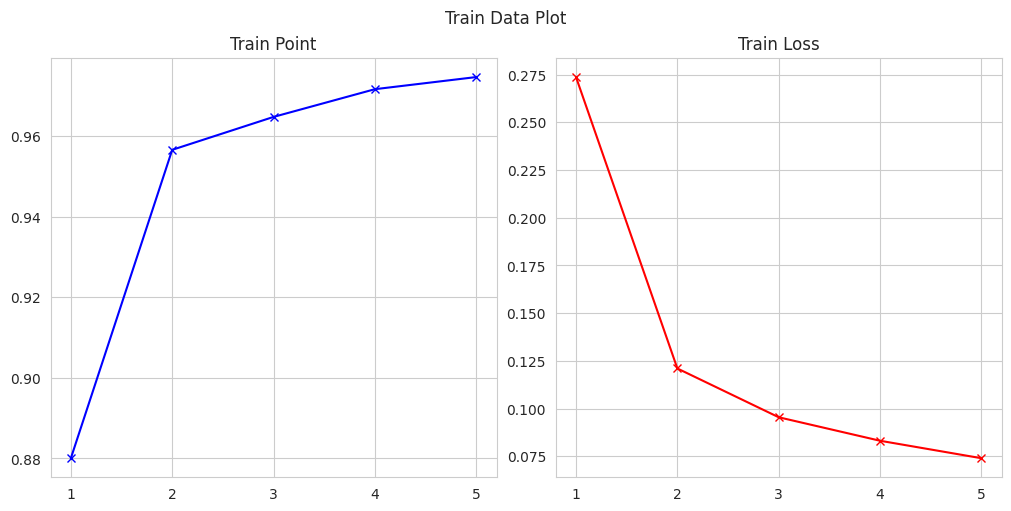

In [11]:
plot = Helplot(plot)

plot.trainplot

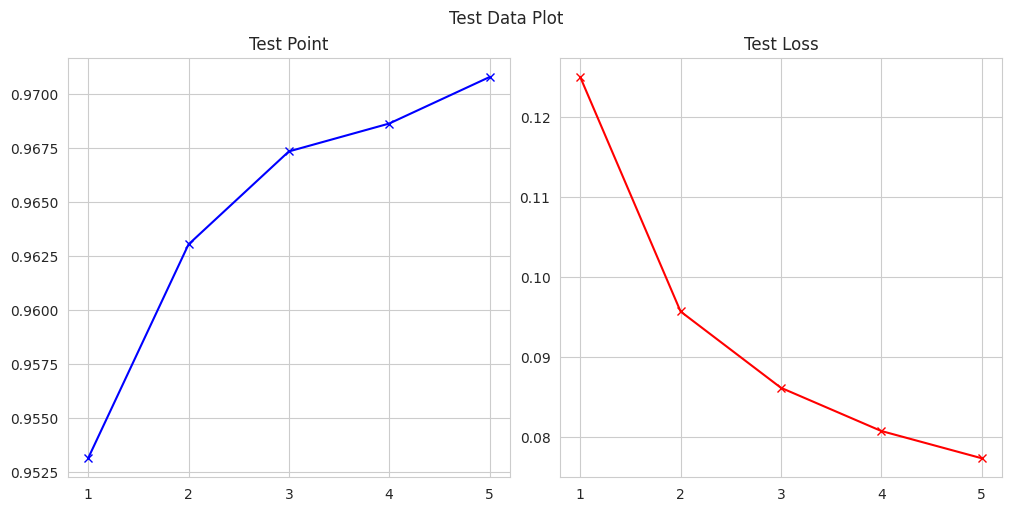

In [12]:
plot.testiplot

In [13]:
import os

molder = "/content/model"

tf.saved_model.save(model, molder)

### ```Optional 0```

In [14]:
meta = lambda filepath : os.path.getsize(filepath) / float(2**20)

In [15]:
tflite = tf.lite.TFLiteConverter

tflite_model = tflite.from_saved_model(molder)

In [16]:
optim = [tf.lite.Optimize.DEFAULT]

tflite_model.optimizations = optim

In [17]:
tflite_model.inference_input_type, tflite_model.inference_output_type

(tf.float32, tf.float32)

In [18]:
import pathlib

tflite_model = tflite_model.convert()

tflite_model_file = pathlib.Path("modelite.tflite")

tflite_model_file.write_bytes(tflite_model)

3381112

In [19]:
round(meta("/content/modelite.tflite"), 3)

3.224

In [20]:
interpreter = tf.lite.Interpreter(model_path="/content/modelite.tflite")

interpreter.get_signature_list()

{'serving_default': {'inputs': ['input_1'], 'outputs': ['dense']}}

In [21]:
model.save("/content/modelite.h5")